In [2]:
import nltk
import nltk.corpus
!pip install nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [4]:
df=pd.read_csv("movie.csv")

In [5]:
#EDA
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [6]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [8]:
print(df.duplicated().sum())

277


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


In [11]:
invalid_count = df[~df['label'].isin([0, 1])].shape[0]
print(f"Number of invalid sentiment values: {invalid_count}")

Number of invalid sentiment values: 0


In [12]:
df = df[df['label'].isin([0, 1])]
df.reset_index(drop=True, inplace=True)

In [13]:
list = [i for i in df['label']]
positive = 0
negative = 0
for i in list:
    if i == 1:
        positive += 1
    if i == 0:
        negative += 1

print(f'Positive : {positive} and Negative : {negative}')

Positive : 19908 and Negative : 19815


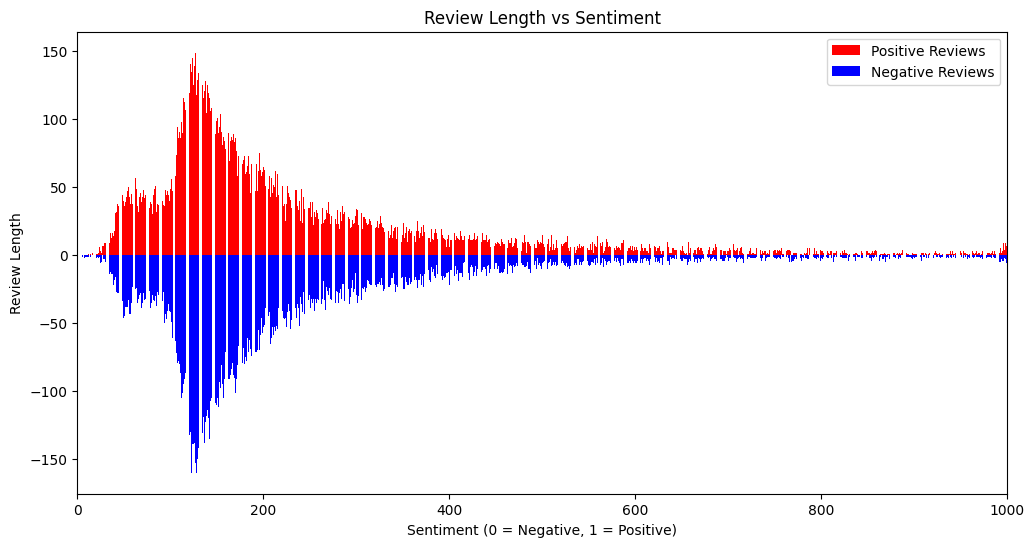

In [14]:
review_length = df['text'].apply(lambda x: len(str(x).split()))
sentiment = df['label'].values
max_len = review_length.max()
positive_counts = np.zeros(max_len + 1, dtype=int)
negative_counts = np.zeros(max_len + 1, dtype=int)

for length, label in zip(review_length, sentiment):
    if label == 1:
        positive_counts[length] += 1
    else:
        negative_counts[length] -= 1
lengths = np.arange(max_len + 1)

plt.figure(figsize=(12,6))
plt.bar(lengths, positive_counts, alpha=1, label='Positive Reviews', color='r')
plt.bar(lengths, negative_counts, alpha=1, label='Negative Reviews', color='b')

plt.title("Review Length vs Sentiment")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Review Length")
plt.legend()
plt.xlim(0,1000)
plt.show()

In [15]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [w.lower() for w in tokens if w.lower() not in stop_words]
    return ' '.join(filtered_tokens)

df['text'] = df['text'].apply(clean_text)

In [16]:
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    cleaned_text = ' '.join(tokens)
    return cleaned_text
df['text'] = df['text'].apply(remove_punctuation)

In [17]:
def stemmers(text):
    stem = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stem.stem(w) for w in words]
    return ' '.join(stemmed_words)
df['text'] = df['text'].apply(stemmers)

In [18]:
def lemmatized(text):
    lem = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lem.lemmatize(w) for w in words]
    return ' '.join(lemmatized_words)
df['text'] = df['text'].apply(lemmatized)

In [1]:
!pip install --upgrade numpy
!pip install --upgrade gensim --no-cache-dir --force-reinstall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━

In [19]:
Sentences = df['text']
Labels = df['label']

In [20]:
#Bag of Words :
cv = CountVectorizer()
BagOfWords = cv.fit_transform(Sentences)

In [21]:
#TF-IDF:
tf = TfidfVectorizer()
tf_idf = tf.fit_transform(Sentences)


In [22]:
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in Sentences]
model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, epochs=10)

def get_sentence_vector(model, sentence):
    tokens = word_tokenize(sentence.lower())
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

word2vec = np.array([get_sentence_vector(model, sentence) for sentence in Sentences])

In [27]:
from sklearn.linear_model import LogisticRegression
# Bag of Words representation
bow_train, bow_test, y_train_bow, y_test_bow = train_test_split(BagOfWords, Labels, test_size=0.2, random_state=20)
bow_classifier = LogisticRegression(max_iter=1000)
bow_classifier.fit(bow_train, y_train_bow)
print(f'Accuracy with Bag of Words: {bow_classifier.score(bow_test, y_test_bow)}')

# TF-IDF representation
tfidf_train, tfidf_test, y_train_tfidf, y_test_tfidf = train_test_split(tf_idf, Labels, test_size=0.2, random_state=20)
tfidf_classifier = LogisticRegression(max_iter=1000)
tfidf_classifier.fit(tfidf_train, y_train_tfidf)
print(f'Accuracy with TF-IDF: {tfidf_classifier.score(tfidf_test, y_test_tfidf)}')

# Word2Vec representation
w2v_train, w2v_test, y_train_w2v, y_test_w2v = train_test_split(word2vec, Labels, test_size=0.2, random_state=20)
w2v_classifier = LogisticRegression(max_iter=1000)
w2v_classifier.fit(w2v_train, y_train_w2v)
print(f'Accuracy with Word2Vec: {w2v_classifier.score(w2v_test, y_test_w2v)}')

Accuracy with Bag of Words: 0.8789175582127124
Accuracy with TF-IDF: 0.8907488986784141
Accuracy with Word2Vec: 0.8677155443675267


In [30]:
#Naive Bayes:
from sklearn.naive_bayes import BernoulliNB
# Bernoulli Naive Bayes with Bag of Words
bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(BagOfWords, Labels, test_size=0.2, random_state=20)
bow_nb = BernoulliNB()
bow_nb.fit(bow_X_train, bow_y_train)
print(f'Naive Bayes Accuracy (Bag of Words): {bow_nb.score(bow_X_test, bow_y_test)}')

# Bernoulli Naive Bayes with TF-IDF
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tf_idf, Labels, test_size=0.2, random_state=20)
tfidf_nb = BernoulliNB()
tfidf_nb.fit(tfidf_X_train, tfidf_y_train)
print(f'Naive Bayes Accuracy (TF-IDF): {tfidf_nb.score(tfidf_X_test, tfidf_y_test)}')

# Bernoulli Naive Bayes with Word2Vec (Not ideal but included for comparison)
w2v_X_train, w2v_X_test, w2v_y_train, w2v_y_test = train_test_split(word2vec, Labels, test_size=0.2, random_state=20)
w2v_nb = BernoulliNB()
w2v_nb.fit(w2v_X_train, w2v_y_train)
print(f'Naive Bayes Accuracy (Word2Vec): {w2v_nb.score(w2v_X_test, w2v_y_test)}')

Naive Bayes Accuracy (Bag of Words): 0.8483322844556325
Naive Bayes Accuracy (TF-IDF): 0.8483322844556325
Naive Bayes Accuracy (Word2Vec): 0.7452485840151039


In [32]:
#SVMs:
from sklearn.svm import LinearSVC

#Bag Of Words :
bow_train, bow_test, label_train_bow, label_test_bow = train_test_split(BagOfWords, Labels, test_size=0.2, random_state=20)
svc_bow = LinearSVC(max_iter=3000)
svc_bow.fit(bow_train, label_train_bow)
print(f'SVM Accuracy with Bag of Words: {svc_bow.score(bow_test, label_test_bow)}')

# Support Vector Machine with TF-IDF
tfidf_train, tfidf_test, label_train_tfidf, label_test_tfidf = train_test_split(tf_idf, Labels, test_size=0.2, random_state=20)
svc_tfidf = LinearSVC(max_iter=3000)
svc_tfidf.fit(tfidf_train, label_train_tfidf)
print(f'SVM Accuracy with TF-IDF: {svc_tfidf.score(tfidf_test, label_test_tfidf)}')

# Support Vector Machine with Word2Vec
w2v_train, w2v_test, label_train_w2v, label_test_w2v = train_test_split(word2vec, Labels, test_size=0.2, random_state=20)
svc_w2v = LinearSVC(max_iter=3000)
svc_w2v.fit(w2v_train, label_train_w2v)
print(f'SVM Accuracy with Word2Vec: {svc_w2v.score(w2v_test, label_test_w2v)}')




/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM Accuracy with Bag of Words: 0.8539962240402769
SVM Accuracy with TF-IDF: 0.8897419760855885
SVM Accuracy with Word2Vec: 0.8669603524229075


In [33]:
#Random Forest :
from sklearn.ensemble import RandomForestClassifier

#Bag of Words :
bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(BagOfWords, Labels, test_size=0.2, random_state=20)
rf_bow = RandomForestClassifier()
rf_bow.fit(bow_X_train, bow_y_train)
print(f'Random Forest Accuracy (Bag of Words): {rf_bow.score(bow_X_test, bow_y_test)}')

# Random Forest on TF-IDF
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tf_idf, Labels, test_size=0.2, random_state=20)
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(tfidf_X_train, tfidf_y_train)
print(f'Random Forest Accuracy (TF-IDF): {rf_tfidf.score(tfidf_X_test, tfidf_y_test)}')

# Random Forest on Word2Vec
w2v_X_train, w2v_X_test, w2v_y_train, w2v_y_test = train_test_split(word2vec, Labels, test_size=0.2, random_state=20)
rf_w2v = RandomForestClassifier()
rf_w2v.fit(w2v_X_train, w2v_y_train)
print(f'Random Forest Accuracy (Word2Vec): {rf_w2v.score(w2v_X_test, w2v_y_test)}')


Random Forest Accuracy (Bag of Words): 0.8482064191315293
Random Forest Accuracy (TF-IDF): 0.849842668344871
Random Forest Accuracy (Word2Vec): 0.8378854625550661


In [34]:
print('Number Of Features in Bag Of Words : ' , BagOfWords.shape[1])
print('Number Of Features in TF-IDF : ' , tf_idf.shape[1])
print('Number Of Features in Word2Vec : ' , word2vec.shape[1])

Number Of Features in Bag Of Words :  64615
Number Of Features in TF-IDF :  64615
Number Of Features in Word2Vec :  100


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
class ModifiedModel(nn.Module):
    def __init__(self, input_dim):
        super(ModifiedModel, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(input_dim, 256), nn.Sigmoid())
        self.layer_mid = nn.Sequential(nn.Linear(256, 128), nn.Sigmoid())  # Additional layer
        self.layer2 = nn.Sequential(nn.Linear(128, 64), nn.Sigmoid())
        self.output = nn.Linear(64, 2)  # Output layer

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer_mid(x)
        x = self.layer2(x)
        x = self.output(x)
        return x

# Train/test split
X_train, X_test, Labels_train, Labels_test = train_test_split(word2vec, Labels, test_size=0.2, random_state=20)

# Model, optimizer, loss
model = ModifiedModel(X_train.shape[1])
optimizer = optim.AdamW(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training loop
for epoch in range(2):
    for x, y in zip(X_train, Labels_train):
        x_tensor = torch.tensor(x, dtype=torch.float32)
        y_tensor = torch.tensor([y], dtype=torch.long)

        output = model(x_tensor)
        loss = loss_fn(output.unsqueeze(0), y_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluation
correct = 0
total = 0
for x, y in zip(X_test, Labels_test):
    x_tensor = torch.tensor(np.array(x), dtype=torch.float32)
    prediction = model(x_tensor)
    predicted_class = torch.argmax(prediction).item()
    if predicted_class == y:
        correct += 1
    total += 1

print(f'Accuracy of Word2Vec (Sigmoid NN): {correct / total:.4f}')


Accuracy of Word2Vec (Sigmoid NN): 0.8617


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
# Splitting the data
tfidf_train, tfidf_test, target_train, target_test = train_test_split(tf_idf, Labels, test_size=0.2, random_state=20)

# Initialize and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(tfidf_train, target_train)

# Predict classes and probabilities
predicted_labels = log_reg_model.predict(tfidf_test)
predicted_probs = log_reg_model.predict_proba(tfidf_test)[:, 1]

# Output evaluation metrics
print("=== Logistic Regression Metrics (TF-IDF) ===")

acc = accuracy_score(target_test, predicted_labels)
print(f"→ Accuracy       : {acc:.4f}")

roc = roc_auc_score(target_test, predicted_probs)
print(f"→ ROC-AUC        : {roc:.4f}")

f1 = f1_score(target_test, predicted_labels, average='weighted')
print(f"→ F1 Score       : {f1:.4f}")

conf_matrix = confusion_matrix(target_test, predicted_labels)
print("\n→ Confusion Matrix:")
print(conf_matrix)

# Optional detailed report (uncomment if needed)
# print("\n→ Classification Report:")
# print(classification_report(target_test, predicted_labels))


=== Logistic Regression Metrics (TF-IDF) ===
→ Accuracy       : 0.8907
→ ROC-AUC        : 0.9581
→ F1 Score       : 0.8907

→ Confusion Matrix:
[[3378  521]
 [ 347 3699]]
